In [2]:
# import zipfile

# # Download file zip của ảnh 10_food_classes 
# # Xem dữ liệu này được tại ra như thế nào - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# # Giải nén file đã the download
# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


### 1. Tìm hiểu dữ liệu (trực quan hoá ....)

In [4]:
!tree 10_food_classes_all_data -d 

10_food_classes_all_data
├── test
│   ├── chicken_curry
│   ├── chicken_wings
│   ├── fried_rice
│   ├── grilled_salmon
│   ├── hamburger
│   ├── ice_cream
│   ├── pizza
│   ├── ramen
│   ├── steak
│   └── sushi
└── train
    ├── chicken_curry
    ├── chicken_wings
    ├── fried_rice
    ├── grilled_salmon
    ├── hamburger
    ├── ice_cream
    ├── pizza
    ├── ramen
    ├── steak
    └── sushi

22 directories


In [5]:
import os

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

all_classes = os.listdir(train_dir)
print("There are {} classes in the dataset".format(len(all_classes)))
print("="*50)
title = ['class', 'train', 'test']
print("{:<20} {:<20} {:<20}".format(*title))
print("-"*50)
total_train = 0
total_test = 0
for i in all_classes:
    print("{:<20} {:<20} {:<20}".format(i, len(os.listdir(train_dir+i)), len(os.listdir(test_dir+i))))
    total_test += len(os.listdir(test_dir+i))
    total_train += len(os.listdir(train_dir+i))
print("-"*50)
print("{:<20} {:<20} {:<20}".format("Total", total_train, total_test))
    

There are 10 classes in the dataset
class                train                test                
--------------------------------------------------
ice_cream            750                  250                 
chicken_curry        750                  250                 
steak                750                  250                 
sushi                750                  250                 
chicken_wings        750                  250                 
grilled_salmon       750                  250                 
hamburger            750                  250                 
pizza                750                  250                 
ramen                750                  250                 
fried_rice           750                  250                 
--------------------------------------------------
Total                7500                 2500                


In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image_path = random.sample(os.listdir(target_folder), 1)
    image = mpimg.imread(target_folder + "/" + random_image_path[0])
    
    plt.imshow(image)
    plt.title(f"{target_class} - {image.shape}")
    plt.axis("off")
    return image

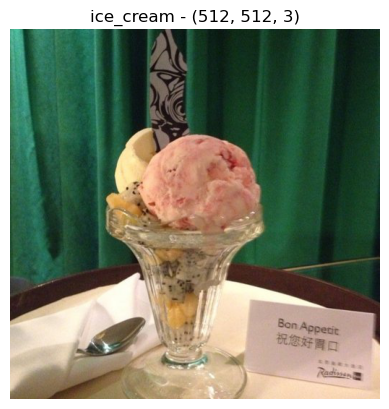

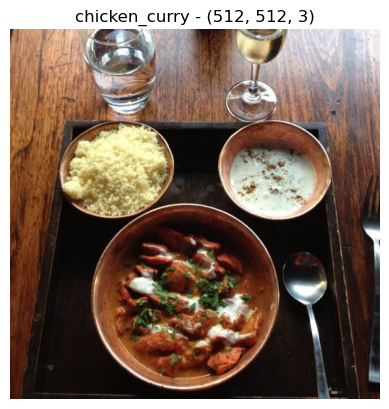

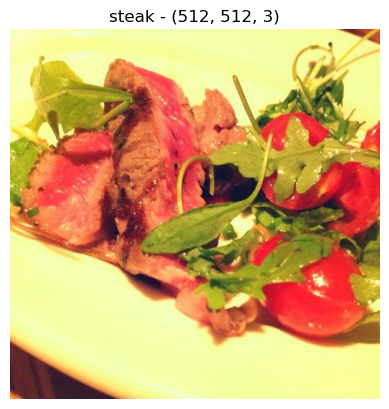

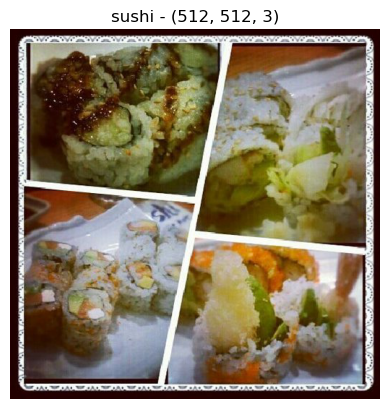

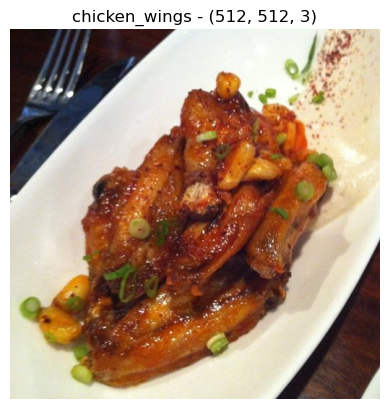

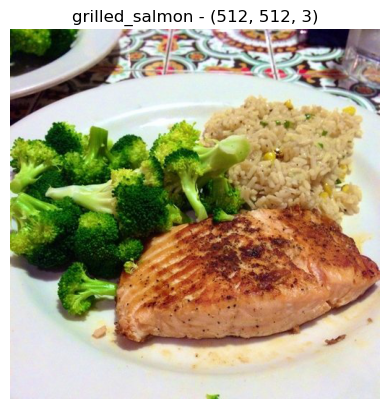

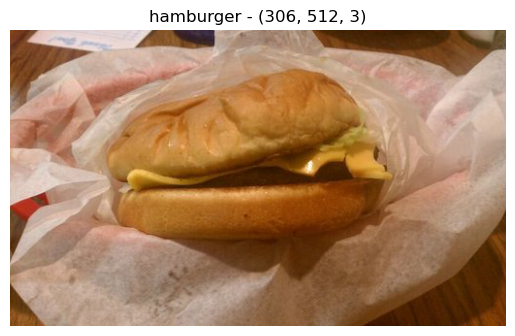

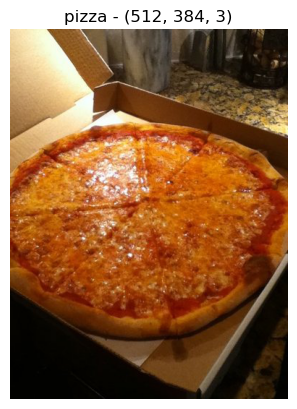

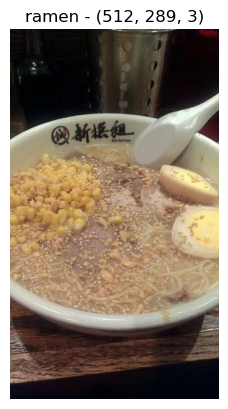

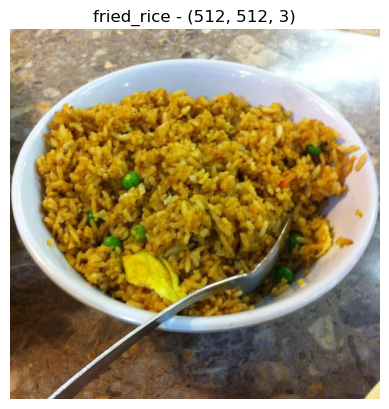

In [7]:
for i in all_classes:
    view_random_image(train_dir, i)
    plt.show()

### 2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(train_dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="categorical")
val_data = test_gen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224, 224),
                                        class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


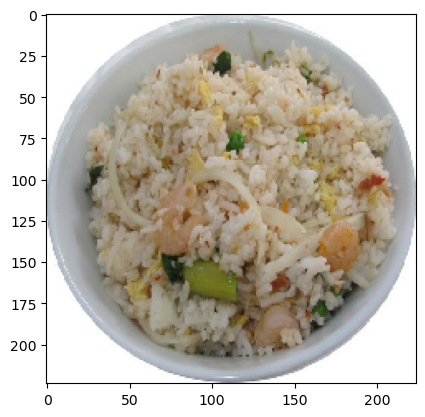

In [9]:
image, label = train_data.next()
plt.imshow(image[0])

### 3. Tạo mô hình (bắt đầu với baseline)

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-13 16:37:41.072011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-13 16:37:41.072142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 4. Khớp mô hình

In [11]:
history_1 = model_1.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data), 
            validation_data=val_data, 
            validation_steps=len(val_data))

Epoch 1/5


2022-10-13 16:37:41.289212: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-13 16:37:41.462504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 3.6791 - accuracy: 0.1493

2022-10-13 16:37:58.878708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 23s 97ms/step - loss: 3.6791 - accuracy: 0.1493 - val_loss: 2.1639 - val_accuracy: 0.2144
Epoch 2/5
235/235 [==============================] - 23s 96ms/step - loss: 1.8562 - accuracy: 0.3637 - val_loss: 2.2522 - val_accuracy: 0.2112
Epoch 3/5
235/235 [==============================] - 23s 97ms/step - loss: 0.6531 - accuracy: 0.8119 - val_loss: 3.1652 - val_accuracy: 0.1920
Epoch 4/5
235/235 [==============================] - 23s 98ms/step - loss: 0.0634 - accuracy: 0.9879 - val_loss: 4.1036 - val_accuracy: 0.1916
Epoch 5/5
235/235 [==============================] - 23s 98ms/step - loss: 0.0150 - accuracy: 0.9983 - val_loss: 5.0906 - val_accuracy: 0.2036


### 5. Đánh gía mô hình

In [12]:
def plot_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    epochs = range(len(history.history["accuracy"]))
    
    plt.plot(epochs, acc, label="Training accuracy")
    plt.plot(epochs, val_acc, label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

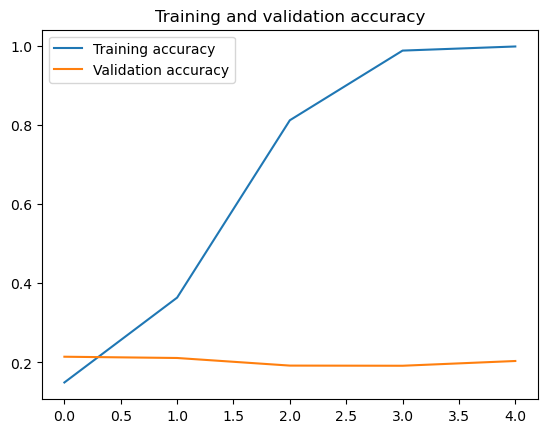

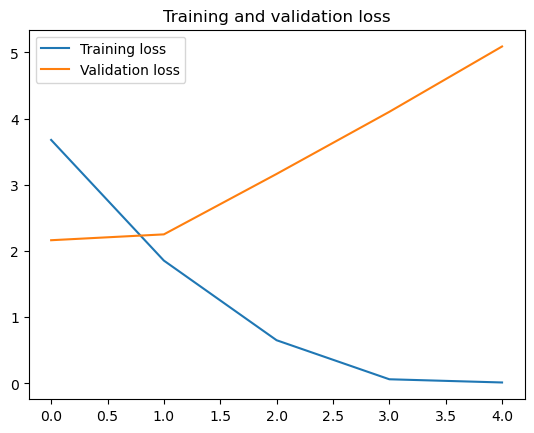

In [13]:
plot_history(history_1)

**=> Mô hình overfit**

Do chưa học transfer learning, nên đối với bài toán về overfit chúng ta sẽ thử update bằng 2 cách sau:
- Thêm maxpool
- Thêm maxpool + augmentation

In [ ]:
model2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

### 6. Điều chỉnh các tham số khác nhau để cải thiện mô hình (vượt baseline)

### 7. Lặp lại cho đến khi thoả mãn